In [1]:
import numpy as np
import pytesseract
from pytesseract import Output
from PIL import Image
import cv2
from matplotlib import pyplot as plt

In [2]:
def display(im_path):
    dbi = 80
    im_data = plt.imread(im_path)
    #print(len(im_data.shape))
    if len(im_data.shape) == 3:
        height, width, depth = im_data.shape
    if len(im_data.shape) == 2:
        height, width = im_data.shape
    
    figsize = width / float(dbi), height / float(dbi)
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])
    ax.axis('off')
    ax.imshow(im_data, cmap='gray')
    plt.show()

def image_readtext(image_file_path):
    myconfigAr = r"--psm 1 --oem 3 -l ara"
    text = pytesseract.image_to_string(Image.open(image_file_path), config=myconfigAr)
    print(text)
    
def image_readtextobj(image_file):
    myconfigAr = r"--psm 12 --oem 3 -l ara"
    text = pytesseract.image_to_string(image_file, config=myconfigAr)
    print(text)
    
def image_readnums_ar(image_file_path):
    myconfigArNums = r"--psm 1 --oem 3 -l ara_number"
    textNums = pytesseract.image_to_string(Image.open(image_file_path), config=myconfigArNums)
    print(textNums)
    
def image_readnumsobj_ar(image_file):
    myconfigArNums = r"--psm 1 --oem 3 -l ara_number"
    textNums = pytesseract.image_to_string(image_file, config=myconfigArNums)
    print(textNums)
    
def thin_font(image, byUnit, iterations):
    image = cv2.bitwise_not(image)
    kernel = np.ones((byUnit, byUnit), np.uint8)
    image = cv2.erode(image, kernel, iterations=iterations)
    image = cv2.bitwise_not(image)
    return image

def thick_font(image, byUnit, iterations):
    image = cv2.bitwise_not(image)
    kernel = np.ones((byUnit, byUnit), np.uint8)
    image = cv2.dilate(image, kernel, iterations=iterations)
    image = cv2.bitwise_not(image)
    return image

def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def noise_removal(image):
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 1)
    return image

In [3]:
def ReadIDCard (file_name):
    img_file = file_name 
    img = cv2.imread(img_file)
    h, w, c = img.shape
    
    th, tw = round(h * 0.23), round(w * 0.4)
    the = round(th + (th * 1.9))
    twe = round(tw + (tw * 1.45))
    cropped_image_text = img[th:the, tw:twe]
    #cropped_image_text = img[160:450, 380:1000]
    
    
    ih, iw = round(h * 0.78), round(w * 0.4)
    ihe = round(ih + (h * 0.087))
    iwe = round(iw + (iw * 1.45))
    #print('id section vars')
    #print(h, w, ih, iw, ihe, iwe)
    cropped_image_IDNum = img[ih:ihe, iw:iwe]
    #cropped_image_IDNum = img[495:550, 400:980]

    #print(img.shape)
    #print(cropped_image_text.shape)
    #print(cropped_image_IDNum.shape)

    gray_image = grayscale(cropped_image_IDNum)

    cropped_image_text_file = 'temp/cropped_image_text.jpg'
    cv2.imwrite(cropped_image_text_file, cropped_image_text)
    gray_image = noise_removal(gray_image)
    img_gray_file = 'temp/gray_image.jpg'
    cv2.imwrite(img_gray_file, gray_image)
    
    display(cropped_image_text_file)
    display(img_gray_file)
    #print('st')
    image_readtextobj(cropped_image_text)
    print('end')
    image_readnums_ar(img_gray_file)
    display(img_file)


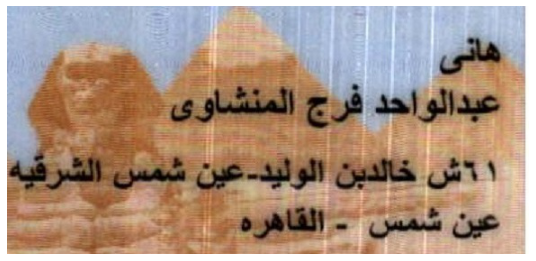

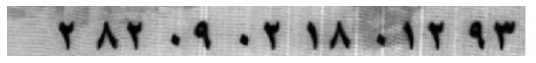

عبدالواحد فرج المنشاوى

7ش خالدبن الوليد- عين شممن الشرقيه

عين شُمَسنَ - القاهره

end
2 82 09 0218 012 93



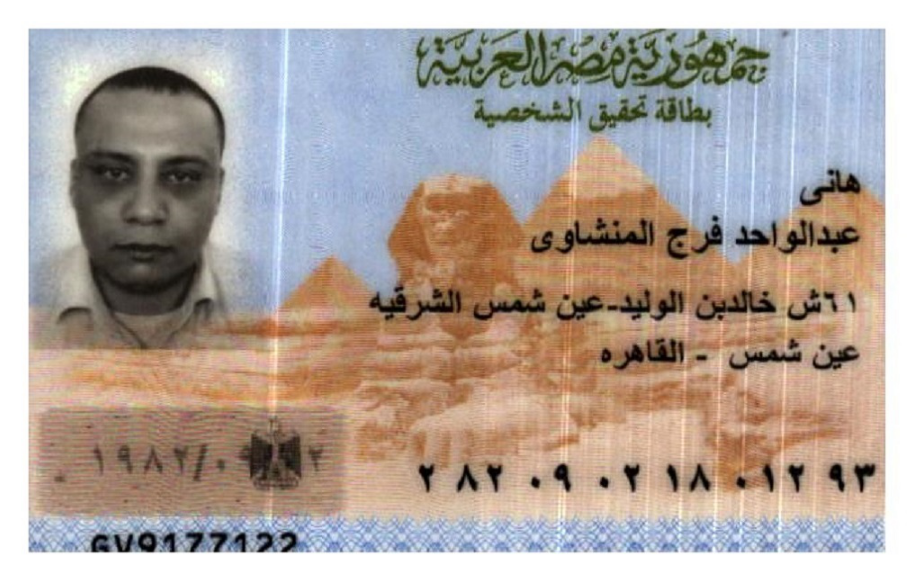

In [4]:
ReadIDCard("OCRImages/tst.jpg")

In [148]:
no_noise = noise_removal(bw_image)
no_noise_file = 'temp/no_noise.jpg'
cv2.imwrite(no_noise_file, no_noise)
display(no_noise_file)

NameError: name 'bw_image' is not defined

In [32]:
image_readtext(img_file)

عر »

7

حر

ارد

بطاقة تحقيق الشخصية

هانى

عبدالواحد فرج المنشاوى

9

١ش‏ خالدبن الوليددعين شمسن الشرقيه

عين شُمَسنَ > القاهرة

“+ يا ىك ‎١ 8١‏ لان ٍ

